1.Создать приложение, которое будет из готового файла с данными «Сбербанка» (https://www.sberbank.com/ru/analytics/opendata) выводить результат по параметрам:

•	Тип данных

•	Интервал дат

•	Область

2.Визуализировать выводимые данные с помощью графика

In [1]:
import requests
from lxml import html
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

%matplotlib inline

In [2]:
link = 'https://www.sberbank.com/ru/analytics/opendata'
url = html.fromstring(requests.get(link).text).xpath("//span[@class='s1']/u/a/@href")[0]
# url = 'http://sbrfdata.ru/opendata.zip'

In [3]:
data = pd.read_csv(url, compression=url[-3:], encoding='cp1251', sep=',')

In [4]:
data.columns

Index(['name', 'region', 'date', 'value'], dtype='object')

In [5]:
print('Типы данных:', data['name'].unique())
print('\nОбласти:', data['region'].unique())

Типы данных: ['Количество заявок на потребительские кредиты'
 'Средняя сумма заявки на потребительский кредит'
 'Количество заявок на ипотечные кредиты'
 'Средняя сумма заявки на ипотечный кредит' 'Количество новых депозитов'
 'Средняя сумма нового депозита' 'Средняя зарплата' 'Средняя пенсия'
 'В среднем руб. на текущем счете на человека'
 'В среднем депозитов в руб. на человека' 'Средние расходы по картам'
 'Средний чек в формате Фастфуд' 'Средний чек в формате Ресторан'
 'Средние траты в ресторане фастфуд' 'Средние траты в ресторане']

Области: ['Россия' 'Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'Еврейская автономная область' 'Забайкальский край'
 'Ивановская область' 'Иркутская область'
 'Кабардино-Балкарская Республика' 'Калининградская область'
 'Калужская область' 'Камчатский край' 'Кемеровская область'
 

In [6]:
print('Возможный интервал дат:', data['date'].min(), '-', data['date'].max())

Возможный интервал дат: 2013-01-15 - 2019-01-15


In [7]:
def get_data(df, type_of_data=None, date_range=None, regions_of_data=None): # date format -> '2013-01-15 - 2019-01-15'
    
    report = []
    new_df = df.copy()
    
    if date_range:
        new_df = new_df[(new_df.date >= date_range.split(' - ')[0]) & (new_df.date <= date_range.split(' - ')[1])]
          
    if type_of_data:
        new_df = new_df[new_df.name==type_of_data]

    if regions_of_data:     
        for region_of_df in regions_of_data: 
            report.append(new_df[new_df.region==region_of_df]) 
    else:
        report.append(new_df[new_df.region=='Россия'])
    
    return report

In [8]:
def get_plot(dfs):

    regions_list = [itm.region.unique()[0] for itm in dfs]
    regions = ', '.join(regions_list)
    
    fig, ax = plt.subplots()
    
    for df in dfs:
        
        ax.plot(df.date, df.value)
    
    ax.set_title(f"""{dfs[0].name.unique()[0]} c {dfs[0].date.min()} по {dfs[0].date.max()} в регионax: 
                 {regions}""",  
                 fontdict={'fontsize':16}, 
                 pad=10)
    
    ax.legend(regions_list)
    
    ax.set_xlabel('Дата')
    ax.set_ylabel(*dfs[0]['name'].unique())
    ax.grid(which='major', axis='both', color='black', ls='-')
    ax.grid(which='minor', axis='both', color='lightgreen', ls='--')

    ax.yaxis.set_minor_locator(ticker.MultipleLocator(100000))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
    ax.xaxis.set_tick_params(rotation=45)
    
    fig.set_size_inches(16, 12)

    plt.show()

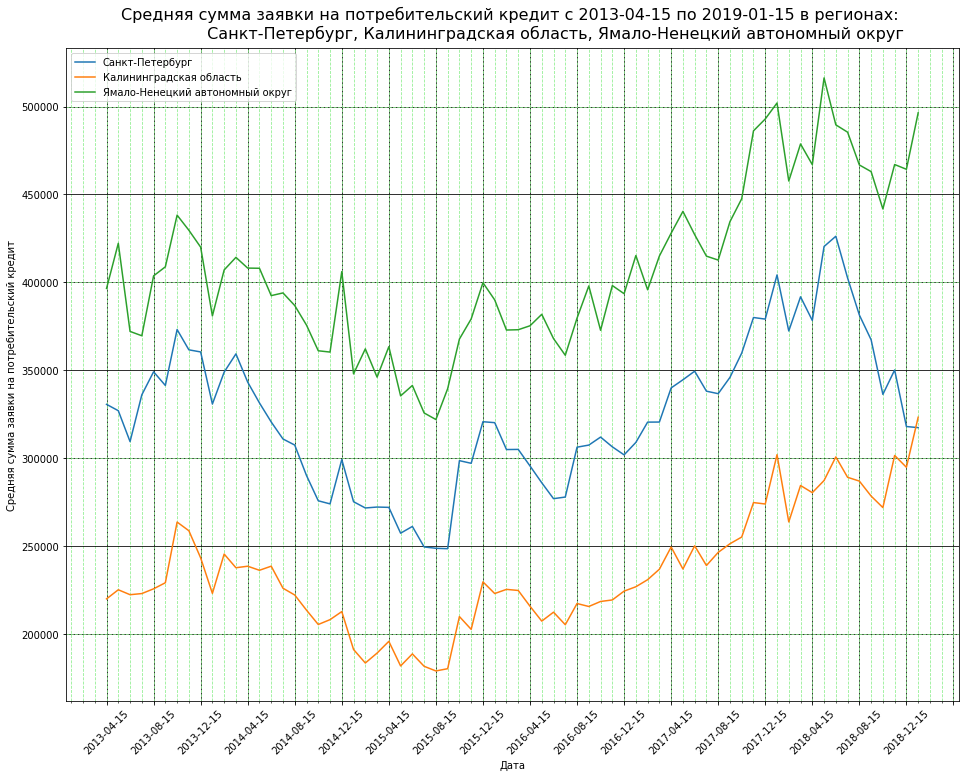

In [9]:
get_plot(get_data(data, 
                  type_of_data='Средняя сумма заявки на потребительский кредит', 
                  regions_of_data=['Санкт-Петербург', 'Калининградская область', 'Ямало-Ненецкий автономный округ'], 
                  date_range='2013-04-15 - 2019-01-15'))